<a href="https://colab.research.google.com/github/furewing/dataAnalysis/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_03_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EC%83%81%EC%B2%AD%EB%82%A0%EC%94%A8_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 3. 공공데이터를 이용한 EDA 분석 - 기상청 데이터 분석

## [질문]
- **Q1. 우리나라 날씨측정 데이터(종관 데이터)의 최초 측정년도는?**
- **Q2. 우리나라에서 가장 더웠던 온도와 년월, 지역은?**
- **Q3. 우리나라에서 가장 추웠던 온도와 년월, 지역은?**
- **Q4. 제주에서 가장 더웠던/추웠던 온도와 년월은?**
- **Q5. 지점별 최고기온/최저기온은?**
- 등등

In [1]:
# (코랩에서) 코드 실행 후 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (23.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

---

### #파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 1. 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 3. 데이터 전처리하기 : 필요한 데이터만 추출하기
 4. 데이터 시각화하기 : 데이터 그래프로 나타내기
 5. 데이터 저장하기 :  파일로 저장하기

---

### #라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 멧플롯립 한글폰트 지정
plt.rc('font', family='NanumBarunGothic')  # 코랩 폰트
#plt.rc('font', family='Malgun Gothic')     # 윈도우 폰트
plt.rcParams['axes.unicode_minus'] = False

---

### 1.데이터 준비하기

- 기상청 사이트에서 날씨 데이터를 다운로드한다.
- 사이트에 가입하고 로그인해야 다운로드할 수 있다.
- https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- csv파일 다운로드해서 사용

---------

### 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기

In [2]:

filename = './OBS_ASOS_MNH_20240423121211.csv'
df = pd.read_csv(filename, encoding='cp949')
df



,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18334,143,대구,1972-11,7.2,21.5,-4.0,1013.4,72.0,81.1,3.1,149.2,0.3
18335,143,대구,1972-12,1.6,15.7,-7.3,1016.2,66.0,22.6,2.6,169.1,0.1
18336,143,대구,1973-01,2.1,10.0,-7.8,1016.0,71.0,65.8,2.2,124.6,NaN
18337,143,대구,1973-02,3.0,16.5,-8.6,1016.4,56.0,16.7,2.8,174.0,NaN


---

### 3.데이터 전처리하기 - 가공하기
- 함수 참고:  https://pandas.pydata.org/docs/reference/index.html

- 데이터 요약

In [3]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18339 entries, 0 to 18338
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  18339 non-null  int64  
 1   지점명                 18339 non-null  object 
 2   일시                  18339 non-null  object 
 3   평균기온(°C)            18200 non-null  float64
 4   최고기온(°C)            18282 non-null  float64
 5   최저기온(°C)            18280 non-null  float64
 6   평균현지기압(hPa)         17025 non-null  float64
 7   평균상대습도(%)           17664 non-null  float64
 8   월합강수량(00~24h만)(mm)  18303 non-null  float64
 9   평균풍속(m/s)           17687 non-null  float64
 10  합계 일조시간(hr)         17555 non-null  float64
 11  최심적설(cm)            4828 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


- 기술통계 정보

In [4]:
df.describe()   #숫자 데이터들만 나오게~

,지점,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
count,18339.000000,18200.000000,18282.000000,18280.000000,17025.000000,17664.000000,18303.000000,17687.000000,17555.000000,4828.000000
mean,118.086155,11.859022,23.756394,1.236915,1004.194432,68.938972,104.663006,2.519268,187.800359,11.466156
std,15.248449,9.454595,8.550117,11.075806,19.388068,10.244097,120.140709,1.152824,44.714509,21.279909
min,90.000000,-11.800000,-0.100000,-29.200000,911.800000,8.000000,0.000000,-0.400000,0.400000,0.000000
25%,105.000000,3.500000,16.500000,-7.800000,999.900000,62.000000,27.600000,1.600000,158.600000,2.000000
50%,115.000000,12.600000,25.500000,0.600000,1008.000000,69.000000,63.200000,2.300000,188.700000,5.100000
75%,133.000000,20.400000,31.000000,11.100000,1015.400000,77.000000,135.300000,3.200000,218.250000,11.400000
max,143.000000,29.300000,40.600000,24.200000,1029.500000,98.000000,1364.200000,8.900000,358.800000,293.600000


#### **1. 결측데이터 시각화**
missingno패키지는 pandas 데이터프레임 데이터에서 누락된 데이터를 찾고 시각화하는 기능 제공

In [5]:
!pip install missingno

- **행에 결측 데이터 시각화**

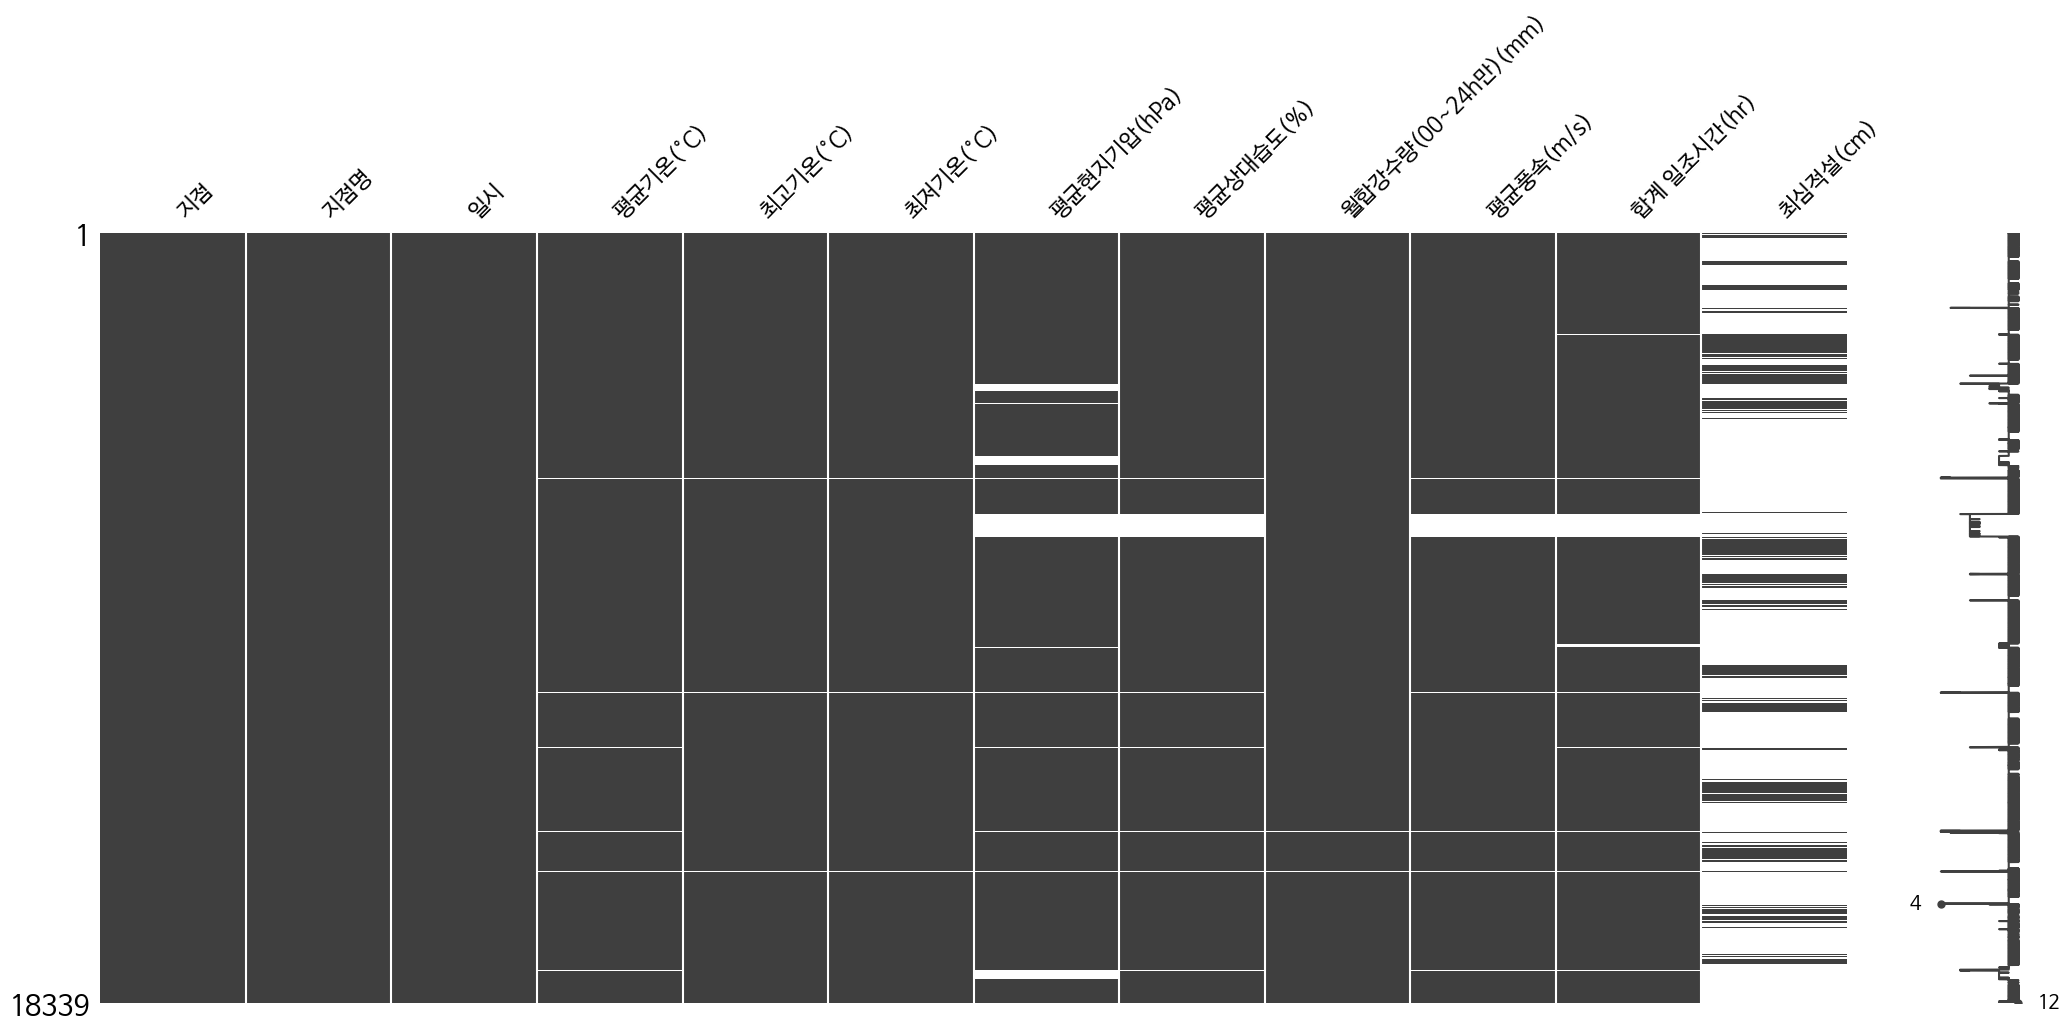

In [6]:
import missingno as msno
msno.matrix(df)
plt.show()

- **열에 결측 데이터 시각화**

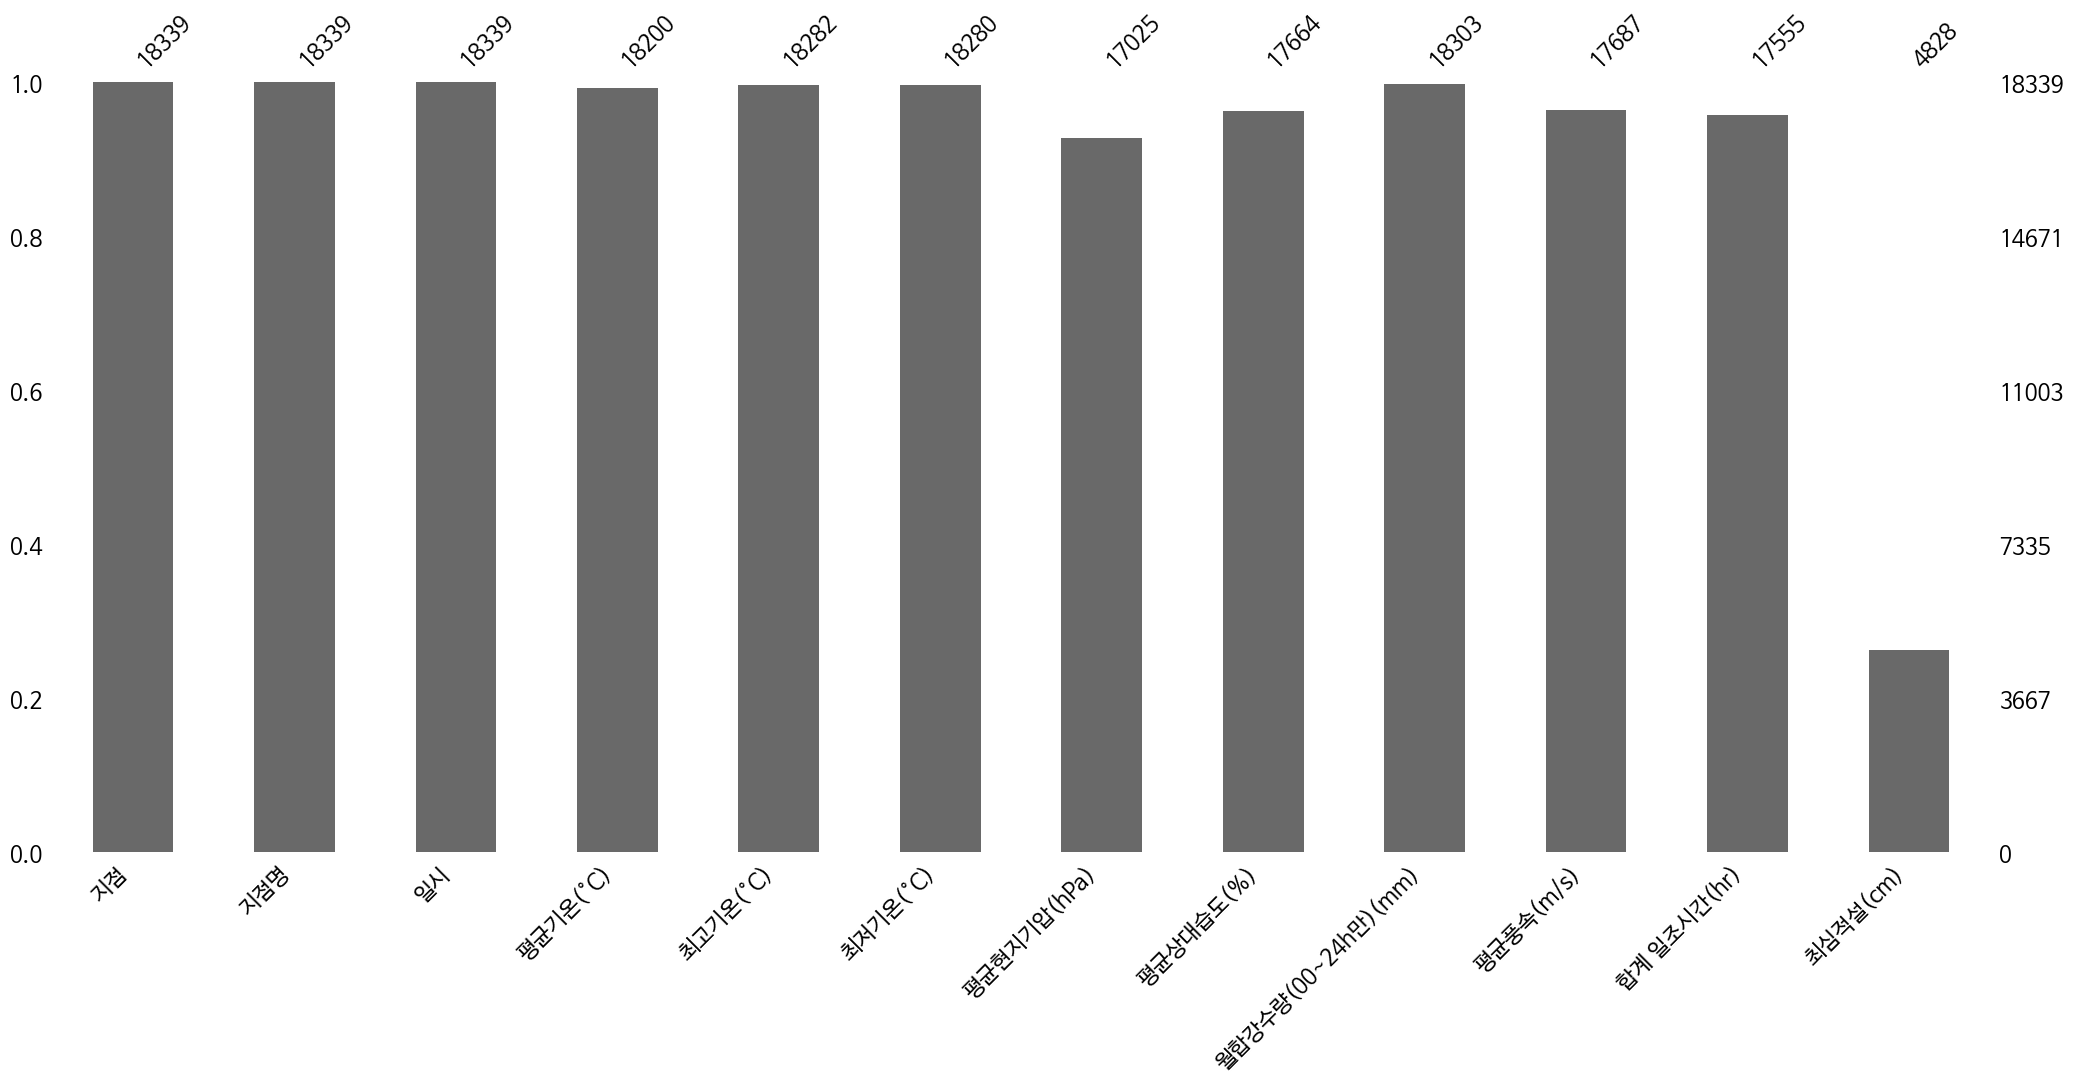

In [7]:
msno.bar(df)
plt.show()

---

#### **2. 컬럼명 변경하기**

In [8]:
# 컬럼명 변경하기 - ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온', '평균현지기압',
#                   '평균상대습도', '월합강수량', '평균풍속','일조시간', '최심적설']
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온', '평균현지기압',
              '평균상대습도', '월합강수량', '평균풍속','일조시간', '최심적설']
df

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18334,143,대구,1972-11,7.2,21.5,-4.0,1013.4,72.0,81.1,3.1,149.2,0.3
18335,143,대구,1972-12,1.6,15.7,-7.3,1016.2,66.0,22.6,2.6,169.1,0.1
18336,143,대구,1973-01,2.1,10.0,-7.8,1016.0,71.0,65.8,2.2,124.6,NaN
18337,143,대구,1973-02,3.0,16.5,-8.6,1016.4,56.0,16.7,2.8,174.0,NaN


#### **3. 컬럼 추가하기 (df.insert())**
DataFrame.insert(추가하고싶은위치,컬럼명,값, allow_duplicate=False)

In [9]:
# 인덱스 3 위치에 '신규'란 이름으로 df['지점'] 데이터를 그대로 추가하기
df.insert(3, '신규', df['지점'])
df

,지점,지점명,일시,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,90,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,90,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18334,143,대구,1972-11,143,7.2,21.5,-4.0,1013.4,72.0,81.1,3.1,149.2,0.3
18335,143,대구,1972-12,143,1.6,15.7,-7.3,1016.2,66.0,22.6,2.6,169.1,0.1
18336,143,대구,1973-01,143,2.1,10.0,-7.8,1016.0,71.0,65.8,2.2,124.6,NaN
18337,143,대구,1973-02,143,3.0,16.5,-8.6,1016.4,56.0,16.7,2.8,174.0,NaN


In [10]:
# 인덱스 3 위치에 '검색일자'란 이름으로 df['일시'] 데이터를 그대로 추가하기
df.insert(3, '검색일자', df['일시'])
df


,지점,지점명,일시,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968-03,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968-04,90,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968-05,90,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18334,143,대구,1972-11,1972-11,143,7.2,21.5,-4.0,1013.4,72.0,81.1,3.1,149.2,0.3
18335,143,대구,1972-12,1972-12,143,1.6,15.7,-7.3,1016.2,66.0,22.6,2.6,169.1,0.1
18336,143,대구,1973-01,1973-01,143,2.1,10.0,-7.8,1016.0,71.0,65.8,2.2,124.6,NaN
18337,143,대구,1973-02,1973-02,143,3.0,16.5,-8.6,1016.4,56.0,16.7,2.8,174.0,NaN


In [11]:
# 인덱스 3 위치에 '년도'란 이름으로 '일시'컬럼에서 년도 부분만 컬럼 추가하기
df.insert(3, '년도', df['일시'].str[:4])      #.str[:4]) 문자열 처음부터 4번째까지 복사(년도 복사) -> 일시를 문자열(str)로 변환
df


,지점,지점명,일시,년도,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968,1968-03,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968,1968-04,90,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968,1968-05,90,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18334,143,대구,1972-11,1972,1972-11,143,7.2,21.5,-4.0,1013.4,72.0,81.1,3.1,149.2,0.3
18335,143,대구,1972-12,1972,1972-12,143,1.6,15.7,-7.3,1016.2,66.0,22.6,2.6,169.1,0.1
18336,143,대구,1973-01,1973,1973-01,143,2.1,10.0,-7.8,1016.0,71.0,65.8,2.2,124.6,NaN
18337,143,대구,1973-02,1973,1973-02,143,3.0,16.5,-8.6,1016.4,56.0,16.7,2.8,174.0,NaN


- **문자열에서 특정 문자 제거**: '검색일자' 값중에 '년도-월' 형태로 되어 있는 구조에서  '-'기호를 제거

In [12]:
#df['검색일자']= df['검색일자'].str.replace('-','')
df['검색일자']= df['검색일자'].str.replace(pat='-', repl='')
df

,지점,지점명,일시,년도,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,196801,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,196802,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968,196803,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968,196804,90,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968,196805,90,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18334,143,대구,1972-11,1972,197211,143,7.2,21.5,-4.0,1013.4,72.0,81.1,3.1,149.2,0.3
18335,143,대구,1972-12,1972,197212,143,1.6,15.7,-7.3,1016.2,66.0,22.6,2.6,169.1,0.1
18336,143,대구,1973-01,1973,197301,143,2.1,10.0,-7.8,1016.0,71.0,65.8,2.2,124.6,NaN
18337,143,대구,1973-02,1973,197302,143,3.0,16.5,-8.6,1016.4,56.0,16.7,2.8,174.0,NaN


- **데이터형 변환하기**: str(object)-->int64 형으로 변환하기

In [13]:
# 데이터 형 변환
df['검색일자'] = df['검색일자'].apply('int64')
df['검색일자'].dtype

dtype('int64')

- **데이터형 변환하기**: int64 --> str(object)형으로 변환하기

In [15]:
df['검색일자'] = df['검색일자'].apply(str)  #str로 형 변환은 '' 생략 가능
df.dtypes

지점          int64
지점명        object
일시         object
년도         object
검색일자       object
신규          int64
평균기온      float64
최고기온      float64
최저기온      float64
평균현지기압    float64
평균상대습도    float64
월합강수량     float64
평균풍속      float64
일조시간      float64
최심적설      float64
dtype: object

#### **4. 컬럼 삭제**

In [16]:
# 앞에서 추가한 '신규', '검색일자' 컬럼 삭제하기
df.drop(['신규','검색일자'], axis=1, inplace=True)  # inplace=True : 삭제 즉시 반영, axis=1(1:열, 0: 행), 삭제 컬럼이 2개 이상일때는 리스트형식으로...['','']]
df

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18334,143,대구,1972-11,1972,7.2,21.5,-4.0,1013.4,72.0,81.1,3.1,149.2,0.3
18335,143,대구,1972-12,1972,1.6,15.7,-7.3,1016.2,66.0,22.6,2.6,169.1,0.1
18336,143,대구,1973-01,1973,2.1,10.0,-7.8,1016.0,71.0,65.8,2.2,124.6,NaN
18337,143,대구,1973-02,1973,3.0,16.5,-8.6,1016.4,56.0,16.7,2.8,174.0,NaN


#### **5. 특정 조건 검색**

- 지점명 총개수와 고유한 지점명

In [17]:
# 지점명 총개수와 고유한 지점명
print( '#지점명 총개수 : ',   len(df.지점명.unique()))
print( '#고유한 지점명1: ',  df.지점명.unique())
print( '#고유한 지점명2: ',  df['지점명'].unique())

#지점명 총개수:  29
#고유한 지점명1:  ['속초' '북춘천' '철원' '동두천' '파주' '대관령' '춘천' '백령도' '북강릉' '강릉' '동해' '서울' '인천'
 '원주' '울릉도' '관악산' '수원' '영월' '충주' '서산' '울진' '청주' '대전' '추풍령' '안동' '상주' '포항'
 '군산' '대구']
#고유한 지점명2:  ['속초' '북춘천' '철원' '동두천' '파주' '대관령' '춘천' '백령도' '북강릉' '강릉' '동해' '서울' '인천'
 '원주' '울릉도' '관악산' '수원' '영월' '충주' '서산' '울진' '청주' '대전' '추풍령' '안동' '상주' '포항'
 '군산' '대구']


In [18]:
# '2023'년도 데이터만 추출하여 df_2023으로 지정하기(검색)
df_2023 = df[df.년도 == '2023']
df_2023

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
660,90,속초,2023-01,2023,0.2,15.1,-16.0,1019.9,45.0,94.7,2.0,215.7,NaN
661,90,속초,2023-02,2023,2.7,15.6,-6.4,1022.3,53.0,43.4,1.9,186.6,NaN
662,90,속초,2023-03,2023,9.3,25.4,-1.7,1016.9,54.0,10.1,2.1,224.0,NaN
663,90,속초,2023-04,2023,12.6,26.9,4.0,1011.6,61.0,57.0,2.2,212.2,NaN
664,90,속초,2023-05,2023,17.0,34.4,5.5,1010.9,67.0,81.0,1.9,232.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17536,140,군산,2023-08,2023,26.9,35.6,19.9,1002.9,82.0,178.8,1.9,225.4,NaN
17537,140,군산,2023-09,2023,23.2,32.3,14.6,1010.2,81.0,199.3,1.7,166.2,NaN
17538,140,군산,2023-10,2023,15.7,24.9,5.4,1016.5,74.0,20.5,1.9,229.8,NaN
17539,140,군산,2023-11,2023,8.6,25.6,-3.4,1019.4,72.0,80.2,2.8,163.4,NaN


In [19]:
# '2023'년도 지점명 총개수와 고유한 지점명
print( '#지점명 총개수: ',  len(df_2023.지점명.unique()))
print( '#고유한 지점명: ',  df_2023.지점명.unique())

#지점명 총개수:  27
#고유한 지점명:  ['속초' '북춘천' '철원' '동두천' '파주' '대관령' '춘천' '백령도' '북강릉' '강릉' '동해' '서울' '인천'
 '원주' '울릉도' '수원' '영월' '충주' '서산' '울진' '청주' '대전' '추풍령' '안동' '상주' '포항' '군산']


In [20]:
# 2024-03월 측정 지점 갯수
len(df[ df.일시 == '2024-03']['지점명'].unique())

27

- **특정 컬럼명 검색** : 지점명=='제주' 데이터

In [21]:
df[df.지점명 == '제주']

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설


- **또는(|) , 포함(in)** 조건 사용: '제주' 또는 '서귀포' 데이터 추출

In [24]:
# 또는(|) 사용
df[ (df['지점명'] == '제주') | (df['지점명'] == '고산') | (df['지점명'] == '성산') | (df['지점명'] == '성산포')  | (df['지점명'] == '서귀포') ]
#df[df.지점명 in ('제주','고산', '성산', '성산포')]     ---> X
df.query("지점명 in ('제주','고산', '성산', '성산포', '서귀포')")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설


- **그리고(&)** 조건 사용

In [22]:
# 특정 지점이 서울권이면서 최고기온이 35도 보다 큰 경우
df[((df.지점명 == '서울') | (df.지점명 == '관악산')) & (df.최고기온 > 35)]


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
5332,108,서울,1909-08,1909,25.3,35.6,19.8,NaN,77.0,216.1,3.7,173.3,NaN
5391,108,서울,1914-07,1914,26.1,35.6,19.4,NaN,84.0,289.1,2.7,204.4,NaN
5426,108,서울,1917-06,1917,21.5,36.7,9.7,NaN,68.0,72.0,2.5,257.9,NaN
5427,108,서울,1917-07,1917,25.7,36.6,17.7,NaN,81.0,223.9,2.2,274.2,NaN
5428,108,서울,1917-08,1917,24.8,36.6,16.4,NaN,78.0,299.7,2.5,243.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,108,서울,2019-08,2019,27.2,36.8,18.5,996.9,69.0,190.5,1.6,239.3,NaN
6647,108,서울,2020-06,2020,23.9,35.4,14.8,996.2,68.0,139.6,2.3,206.1,NaN
6660,108,서울,2021-07,2021,28.1,36.5,19.6,998.1,71.0,168.3,2.0,195.2,NaN
6672,108,서울,2022-07,2022,27.3,36.1,20.8,995.6,77.0,252.3,2.1,140.1,NaN


### [실습문제] 관측 지점이 제주도 내부에 있는 관측소 데이터 검색

In [ ]:
# 포함(in) 사용
df.query("지점명 in ('제주','고산', '성산', '성산포', '서귀포')")


### **Q1. 우리나라 날씨측정 데이터(종관 데이터)의 최초 측정년도는?**

- **min()** : 최초 측정월, 마지막 측정월

In [ ]:
# 최초 측정월, 마지막 측정월
print ( '최초 측정일시: ',  min(df.일시) )
print ( '최근 측정일시: ',  max(df.일시) )

print ( '최초 측정일시: ',  df.일시.min() )
print ( '최근 측정일시: ',  df.일시.max() )

최초 측정일시:  1904-04
최근 측정일시:  2024-03
최초 측정일시:  1904-04
최근 측정일시:  2024-03


In [23]:
# 최초 측정월을 입력으로 받아서 조건 검색하기
df[df.일시 == df.일시.min()]
df.query(f"일시 == '{df.일시.min()}' ")


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
6693,112,인천,1904-04,1904,NaN,19.2,6.4,NaN,NaN,104.9,NaN,NaN,NaN


- **max()** : 최근 측정 월 데이터 추출하기

In [ ]:
# 최근 측정 월 데이터 추출하기
df[df.일시 == df.일시.max()]


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
674,90,속초,2024-03,2024,5.7,20.6,-7.4,1015.2,58.0,58.6,2.2,212.9,NaN
764,93,북춘천,2024-03,2024,4.9,22.5,-11.3,1006.8,55.0,40.9,1.5,219.4,3.2
1199,95,철원,2024-03,2024,4.4,21.7,-11.9,999.8,63.0,42.4,1.6,221.1,NaN
1514,98,동두천,2024-03,2024,5.7,23.6,-10.2,1004.4,57.0,38.0,1.6,209.1,NaN
1781,99,파주,2024-03,2024,4.7,23.1,-10.5,1015.5,66.0,20.4,1.9,210.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55137,288,밀양,2024-03,2024,8.6,24.5,-5.6,1016.6,53.0,79.7,1.3,200.5,NaN
55760,289,산청,2024-03,2024,7.4,24.8,-8.1,1001.9,61.0,89.9,2.1,197.1,NaN
56384,294,거제,2024-03,2024,9.2,22.2,-4.1,1012.8,63.0,127.3,1.7,190.4,NaN
57010,295,남해,2024-03,2024,9.0,21.6,-5.1,1012.6,62.0,149.9,1.9,206.3,NaN


In [ ]:
# 지점명이 '제주'인 최근 측정 데이터
df[(df.지점명 == '제주') & (df.일시 == df.일시.max())]


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
30116,184,제주,2024-03,2024,10.9,26.7,1.3,1016.0,62.0,98.1,3.7,159.8,NaN


In [ ]:
# 제주내의 지점들의 최근 측정 데이터
df.query(f"지점명 in ('제주','고산', '성산', '성산포', '서귀포') & 일시 == '{df.일시.max()}' ")


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
30116,184,제주,2024-03,2024,10.9,26.7,1.3,1016.0,62.0,98.1,3.7,159.8,NaN
30551,185,고산,2024-03,2024,10.4,17.9,1.2,1009.6,72.0,74.8,7.0,151.2,NaN
31605,188,성산,2024-03,2024,10.3,20.0,-0.1,1016.2,70.0,135.7,3.4,172.7,NaN
32364,189,서귀포,2024-03,2024,11.1,19.3,0.7,1012.3,67.0,155.5,1.9,193.5,NaN


### **Q2. 우리나라에서 가장 더웠던 온도와 년월, 지역은?**

In [ ]:
# 컬럼 추출


# 행 추출



In [29]:
# 전체 최고기온
df.query(f" 최고기온 == {df['최고기온'].max()} ")

# 전체 최고기온 일시
df.query(f" 최고기온 == {df['최고기온'].max()} ")['일시'].str[0:4]

# 전체 최고기온 지점명
df.query(f" 최고기온 == {df['최고기온'].max()} ")['지점명'].iloc[0]


'북춘천'

In [ ]:
# 행 추출 특정 컬럼값(년월) 추출
yymm =
print(f'기상관측 데이터를 통해 가장 더웠던 년-월: {yymm}')


# 행 추출 특정 컬럼값(최고기온) 추출



### **Q3. 우리나라에서 가장 추웠던 온도와 년월, 지역은?**

### **Q4. 제주에서 가장 더웠던/추웠던 온도와 년월은?**

In [ ]:
# 제주에서 가장 더웠던 데이터





### **[실습문제] 서울에서 가장 더웠던/추웠던 온도와 년월은?**

--------

#### **6. 그룹핑(Grouping)**

#### #그룹핑: 지점별  

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18339 entries, 0 to 18338
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점      18339 non-null  int64  
 1   지점명     18339 non-null  object 
 2   일시      18339 non-null  object 
 3   년도      18339 non-null  object 
 4   평균기온    18200 non-null  float64
 5   최고기온    18282 non-null  float64
 6   최저기온    18280 non-null  float64
 7   평균현지기압  17025 non-null  float64
 8   평균상대습도  17664 non-null  float64
 9   월합강수량   18303 non-null  float64
 10  평균풍속    17687 non-null  float64
 11  일조시간    17555 non-null  float64
 12  최심적설    4828 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [32]:
# 지점명별 숫자 컬럼의 평균값
df.groupby('지점명').mean(numeric_only=True)    # -> 그룹핑을 하면 지점명이 index가 된다!
df.groupby('지점명').mean(numeric_only=True).head(2)

,지점,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
지점명,,,,,,,,,,
강릉,105.0,12.578892,25.015373,2.278582,1013.744905,64.008975,112.423169,2.906283,190.126842,17.191809
관악산,116.0,9.536667,20.106667,-1.104444,957.964444,71.077778,127.027778,4.557303,0.400000,10.871429


In [35]:
# 지점명별 해당 컬럼의 데이터 빈도수
df.groupby(['지점명'], as_index=False).count()    # 그룹핑 컬럼으로 index를 지정하지 않을 때 (as_index=False) 사용
df.groupby('지점명').count().reset_index()  # df.groupby('지점명').count()는 지점명으로 index가 지정 -> reset_index()로 인덱스 새로 지정(0~)


,지점명,지점,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,강릉,1340,1340,1340,1336,1340,1340,1158,1337,1338,1337,1330,293
1,관악산,90,90,90,90,90,90,90,90,90,89,1,35
2,군산,675,675,675,675,675,675,675,675,675,674,675,186
3,대관령,633,633,633,627,633,633,627,627,632,632,626,259
4,대구,795,795,795,771,795,795,564,771,794,771,770,127
5,대전,663,663,663,663,663,663,663,663,663,663,663,213
6,동두천,315,315,315,315,315,315,315,315,315,315,315,58
7,동해,383,383,383,383,383,383,383,383,382,383,381,58
8,백령도,284,284,284,284,284,284,284,284,281,284,284,82
9,북강릉,189,189,189,188,189,189,188,188,189,188,189,55


#### #그룹핑(컬럼1개): 지점별  평균기온

In [36]:
# 방법1
df['평균기온'].groupby(df['지점명']).mean()

지점명
강릉     12.578892
관악산     9.536667
군산     12.774222
대관령     6.816268
대구     12.512970
대전     12.683560
동두천    11.449206
동해     12.926371
백령도    11.320423
북강릉    12.710638
북춘천    10.937778
상주     12.737453
서산     11.881778
서울     11.719647
속초     12.248148
수원     11.874412
안동     11.977460
영월     11.177493
울릉도    12.300000
울진     12.683094
원주     11.434146
인천     11.460365
철원     10.287126
청주     12.467540
추풍령    11.575228
춘천     11.079542
충주     11.486992
파주     10.911610
포항     13.835857
Name: 평균기온, dtype: float64

In [37]:
# 방법2(제일 많이 사용)
df.groupby('지점명')['평균기온'].agg('mean')

지점명
강릉     12.578892
관악산     9.536667
군산     12.774222
대관령     6.816268
대구     12.512970
대전     12.683560
동두천    11.449206
동해     12.926371
백령도    11.320423
북강릉    12.710638
북춘천    10.937778
상주     12.737453
서산     11.881778
서울     11.719647
속초     12.248148
수원     11.874412
안동     11.977460
영월     11.177493
울릉도    12.300000
울진     12.683094
원주     11.434146
인천     11.460365
철원     10.287126
청주     12.467540
추풍령    11.575228
춘천     11.079542
충주     11.486992
파주     10.911610
포항     13.835857
Name: 평균기온, dtype: float64

In [39]:
# 방법3
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean'})



,평균기온
지점명,
강릉,12.578892
관악산,9.536667
군산,12.774222
대관령,6.816268
대구,12.512970
대전,12.683560
동두천,11.449206
동해,12.926371
백령도,11.320423


<Axes: xlabel='지점명'>

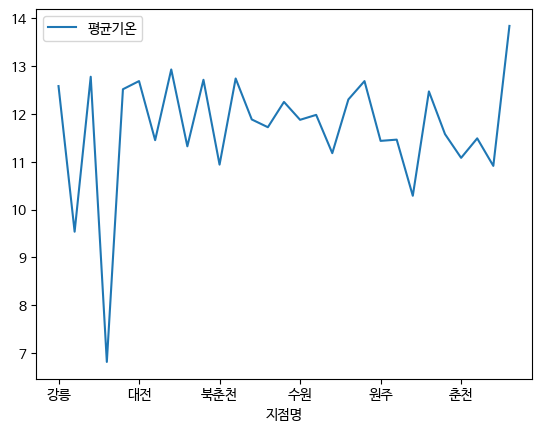

In [45]:
# 그래프 그리기
df.groupby('지점명').aggregate({'평균기온':'mean'}).plot()
#df.groupby('지점명').aggregate({'평균기온':'mean'}).plot(kind='bar')

In [46]:
# 지점명별 평균기온, 최고기온,최저기온 그룹핑하기
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean',
                                    '최고기온':'max',
                                    '최저기온':'min'})

,평균기온,최고기온,최저기온
지점명,,,
강릉,12.578892,28.5,-5.2
관악산,9.536667,23.5,-8.4
군산,12.774222,28.3,-4.5
대관령,6.816268,22.4,-11.4
대구,12.512970,29.3,-5.1
대전,12.683560,29.2,-6.2
동두천,11.449206,27.2,-8.8
동해,12.926371,27.4,-2.3
백령도,11.320423,25.0,-4.3


#### #그룹핑(컬럼 2개): 지점명+년도별,  평균기온

In [47]:
df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균':'mean'})
df.groupby(['지점명','년도']).aggregate({'평균기온':'mean'})
#df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균기온':'mean'}).reset_index()

평균기온
지점명 년도             
강릉  1911        NaN
    1912  11.733333
    1913  11.683333
    1914  13.175000
    1915  12.091667
...             ...
포항  2020  15.058333
    2021  15.150000
    2022  15.058333
    2023  15.683333
    2024   6.266667

[1572 rows x 1 columns]

<Axes: xlabel='지점명,년도'>

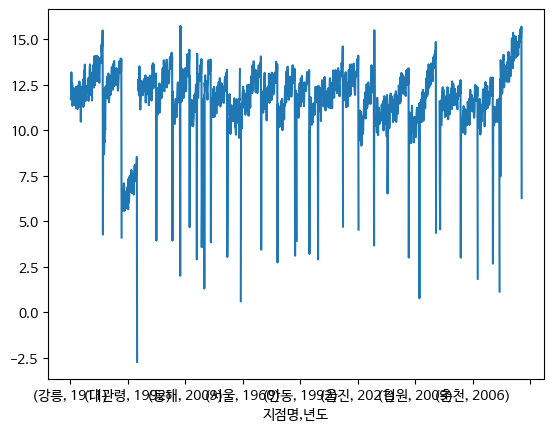

In [48]:
# 선그래프 그리기
df.groupby(['지점명','년도'])['평균기온'].agg('mean').plot()


### **Q5. 지점별 최고기온/최저기온은?**

In [49]:
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'})
df.groupby('지점명').aggregate({'최고기온':'max',
                            '최저기온':'min'})

,최고기온,최저기온
지점명,,
강릉,39.4,-20.2
관악산,33.4,-22.8
군산,37.1,-16.8
대관령,32.9,-28.9
대구,40.0,-20.2
대전,39.4,-19.0
동두천,38.7,-26.2
동해,37.1,-14.0
백령도,33.5,-17.4


- 인텍스를 초기화 하는 방법

In [ ]:
# 인텍스를 초기화 하는 방법
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
df.groupby('지점명').aggregate({'최고기온':'max'}).reset_index()

### [실습문제] : 지점별 년도별 최다 월합강수량?

In [ ]:
df.groupby(['지점명','년도'])['월합강수량'].agg(**{'최다월합강수량':'max'})
df.groupby(['지점명','년도']).aggregate({'월합강수량':'max'})

### [실습문제]  제주 전역의 지점별+년도별 최고 최고기온, 최저 최저기온 ,최다 월합강수량, 최다 최심적실은?

In [52]:
df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'최고기온':'max',
                                          '최저기온':'min',
                                          '월합강수량':'max',
                                          '최심적설':'max'})

df2.to_csv('./제주-년도별-날씨정보.csv', encoding='cp949')
df2

,,최고기온,최저기온,월합강수량,최심적설
지점명,년도,,,,


#### 6.가공된 파일 신규 저장하기

In [ ]:
# 가공된 데이터 신규 파일로 저장하기
outfile = './weather_data.csv'
df.to_csv(outfile, encoding='cp949', mode='w', index=True)

--------------------------

## 4. 데이터 시각화하기

### [실습] : 지점별 평균기온 그래프

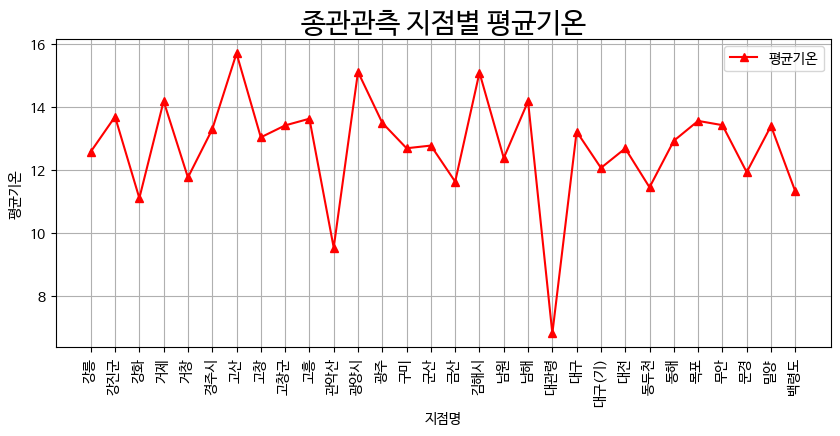

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']
plt.rc('font', family='NanumBarunGothic')  # 코랩 폰트

# 1.데이터 불러오기
file = './OBS_ASOS_MNH_20240423121211.csv'
df = pd.read_csv(file, encoding='cp949')
df

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)

# 3.지점별 평균 구하기(지점 30개만 추출)
df_ = df.groupby('지점명').aggregate({'평균기온':'mean'}).head(30)

plt.plot(df_, marker='^', linestyle='solid', c='red', label='평균기온')
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점명'); plt.ylabel('평균기온');
plt.legend(); plt.grid();
plt.savefig('./지점별그래프.png')
plt.show()

### [실습문제] : '제주' 지점의 년도별 평균기온을  선 그래프로 나타내기

In [ ]:
# 제주 지점 연도별 그룹핑하기
df_jeju = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df_jeju = df_jeju.groupby(['년도']).aggregate({'평균기온':'mean'}).reset_index()
X = df_jeju.년도
Y = df_jeju.평균기온


# 제주 지점 평균 구하기
plt.plot(X, Y, '^', linestyle='solid', c='r', label='평균기온(°C)')
plt.title('제주 지점 평균기온', fontsize=20)
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

### [실습]: 제주의 평균기온, 최고기온, 최저기온 통계를 그래프로 나타내기

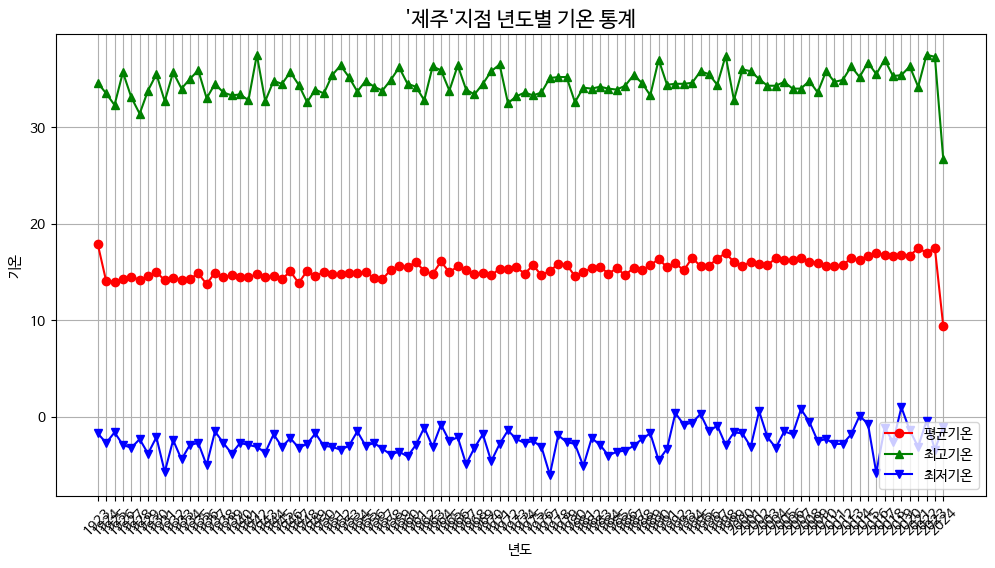

In [58]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도').평균기온.agg(**{'평균기온':'mean'})
data2 = data.groupby('년도').최고기온.agg(**{'최고기온':'max'})
data3 = data.groupby('년도').최저기온.agg(**{'최저기온':'min'})

# 3. 그래프로 시각화하기
plt.plot(data1, 'o', linestyle='solid', c='r', label='평균기온')
plt.plot(data2, '^', linestyle='solid', c='g', label='최고기온')
plt.plot(data3, 'v', linestyle='solid', c='b', label='최저기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')     # x축 레이블
plt.ylabel('기온')     # y축 레이블
plt.legend()           #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기
plt.grid()               # 격자 표시

plt.show()


In [ ]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,5))

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).reset_index()
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'}).reset_index()

# 3. 그래프로 시각화하기
X = data1['년도']
Y1 = data1['평균기온']
Y2 = data2['최고기온']
plt.bar(X, Y1, label='평균기온')
plt.plot(X, Y2, 'o', linestyle='solid', c='r', label='최고기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')        # x축 레이블
plt.ylabel('기온')        # y축 레이블
plt.legend()             #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기

plt.grid()               # 격자 표시

plt.show()

### [실습]: 제주의 최고기온(선그래프),평균기온(막대그래프)을 혼합 그래프로 나타내기

In [ ]:
# 3. 그래프로 시각화하기
plt.figure(figsize=(20,5))
plt.title('제주 기온 통계', fontsize=15)         #제목
plt.legend(['최고기온','평균기온']) #범례,기본 위치 : loc='upper left'
plt.xlabel('년도')                 # x축 레이블
plt.ylabel('기온')                 # y축 레이블
plt.xticks(rotation=45)           # x축 레이블 기울이기
plt.grid()                        # 격자 표시

plt.bar(X, Y1)  # 막대 그래프
plt.plot(X, Y2, 'o', linestyle='solid', c='r')  # 선그래프
plt.show()


### [실습] : 2중 축 그래프 그리기 :  평균상대습도 & 월합강수량

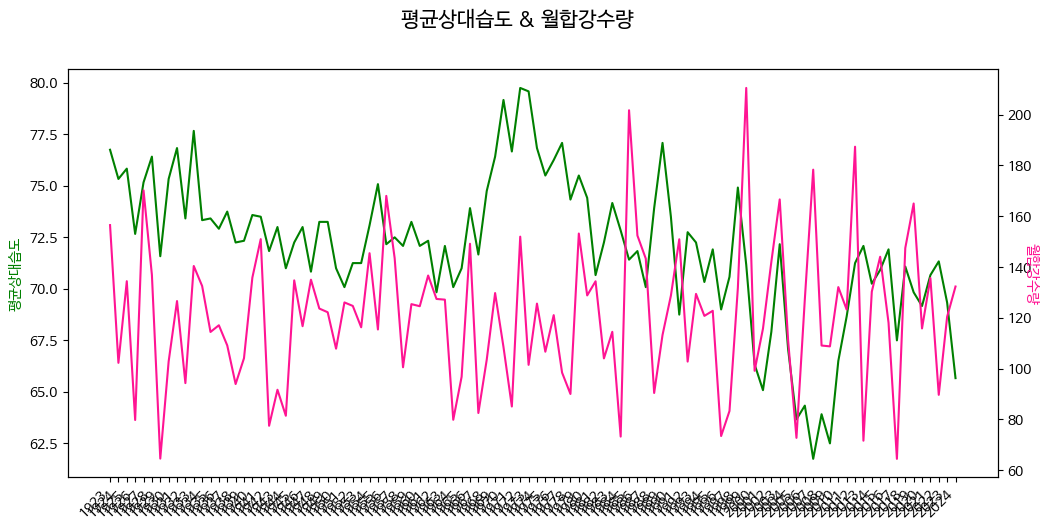

In [60]:
# 2.'제주'지점의 평균상대습도 & 일최다강수량 센터수
data = df.groupby(['지점명','년도'])['평균상대습도'].agg(**{'평균상대습도':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
X  = data['년도']
Y1 = data['평균상대습도']

data = df.groupby(['지점명','년도'])['월합강수량'].agg(**{'월합강수량':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
Y2 = data['월합강수량']
# print(Y2)


# 3. 그래프로 시각화하기
# 왼쪽 축 그래프
fig, ax1 = plt.subplots()
plt.suptitle('평균상대습도 & 월합강수량',fontsize=15)
ax1.plot(X, Y1, color='green')     # 평균상대습도 (왼쪽)
ax1.set_ylabel('평균상대습도', color = 'green', rotation = 90)

# 오른쪽 축 그래프
ax2 = ax1.twinx()
ax2.plot(X, Y2, color='deeppink')  # 월합강수량 (오른쪽)
ax2.set_ylabel('월합강수량', color = 'deeppink', rotation = 270)

fig.autofmt_xdate(rotation=45)  #X축 레이블 기울이기
plt.savefig('./graph.png')
plt.show()

-------

---------

끝!